In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score , confusion_matrix , classification_report , roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

In [7]:
try:
    BASE_DIR = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # Fallback for Jupyter or interactive mode
    BASE_DIR = os.getcwd()

file_path = os.path.join(BASE_DIR, "cleaned_data.csv")
df = pd.read_csv(file_path)


In [8]:
X = df.drop(' loan_status', axis=1)
y = df[' loan_status']
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nTarget distribution:\n{y.value_counts()}")
print(f"\nClass imbalance ratio: {y.value_counts()[0] / y.value_counts()[1]:.2f}:1")

Features shape: (4269, 11)
Target shape: (4269,)

Target distribution:
 loan_status
0    2656
1    1613
Name: count, dtype: int64

Class imbalance ratio: 1.65:1


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeatures scaled using StandardScaler")


Features scaled using StandardScaler


# Logistic Regression

In [19]:
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

print("\n--- Logistic Regression Results ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lr):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_lr):.4f}")


--- Logistic Regression Results ---
Accuracy: 0.9227
Precision: 0.9159
Recall: 0.8762
F1-Score: 0.8956
ROC-AUC: 0.9136


In [20]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['Not Approved', 'Approved']))


Classification Report:
              precision    recall  f1-score   support

Not Approved       0.93      0.95      0.94       531
    Approved       0.92      0.88      0.90       323

    accuracy                           0.92       854
   macro avg       0.92      0.91      0.92       854
weighted avg       0.92      0.92      0.92       854



In [21]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("\nConfusion Matrix:")
print(cm_lr)


Confusion Matrix:
[[505  26]
 [ 40 283]]


# Decision Tree

In [23]:
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)

print("\n--- Decision Tree Results ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_dt):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_dt):.4f}")


--- Decision Tree Results ---
Accuracy: 0.9766
Precision: 0.9496
Recall: 0.9907
F1-Score: 0.9697
ROC-AUC: 0.9793


In [24]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt, target_names=['Not Approved', 'Approved']))


Classification Report:
              precision    recall  f1-score   support

Not Approved       0.99      0.97      0.98       531
    Approved       0.95      0.99      0.97       323

    accuracy                           0.98       854
   macro avg       0.97      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [25]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("\nConfusion Matrix:")
print(cm_dt)


Confusion Matrix:
[[514  17]
 [  3 320]]


# Model Comparison

In [26]:
comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt)
    ],
    'Precision': [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_dt)
    ],
    'Recall': [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_dt)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_dt)
    ]
})

print(comparison.to_string(index=False))

              Model  Accuracy  Precision   Recall  F1-Score
Logistic Regression  0.922717   0.915858 0.876161  0.895570
      Decision Tree  0.976581   0.949555 0.990712  0.969697


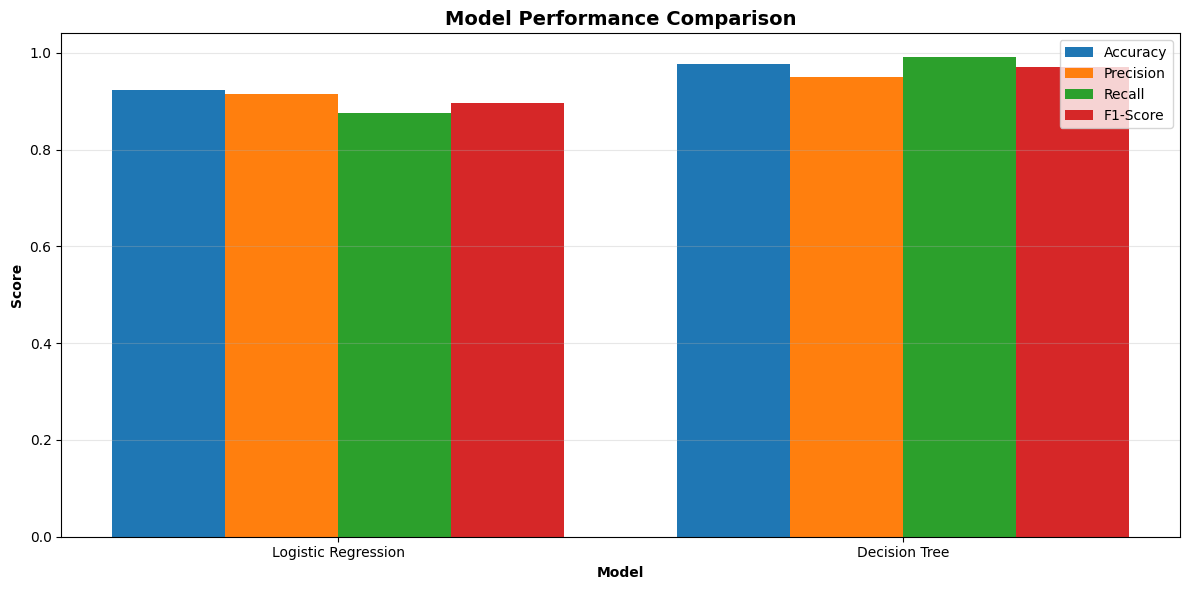

In [27]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(comparison))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))
for i, metric in enumerate(metrics):
    ax.bar(x + i * width, comparison[metric], width, label=metric)

ax.set_xlabel('Model', fontweight='bold')
ax.set_ylabel('Score', fontweight='bold')
ax.set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(comparison['Model'])
ax.legend()
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

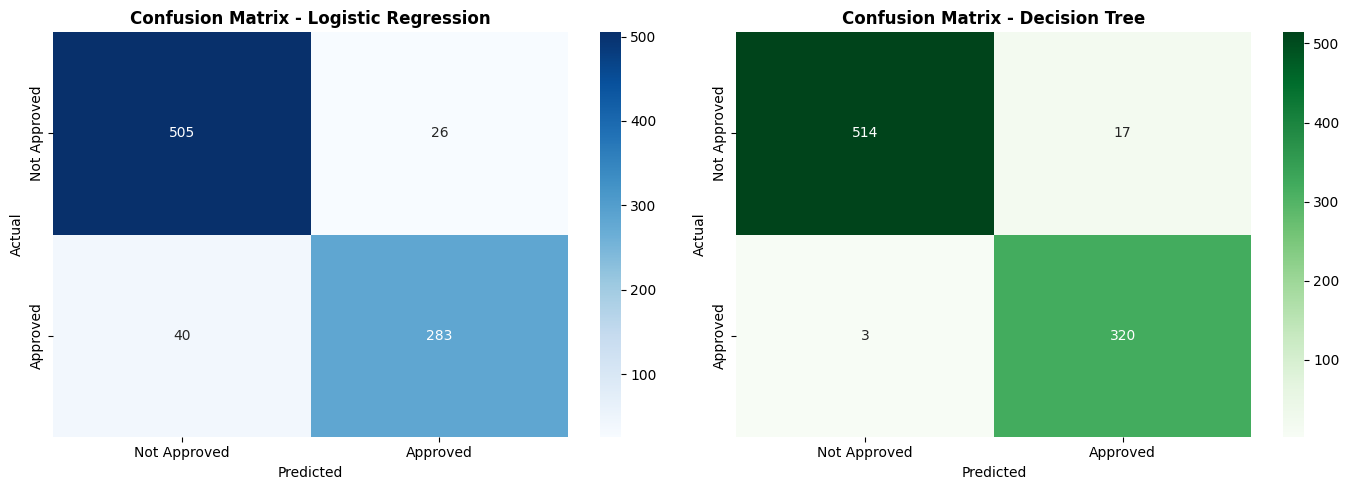

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Logistic Regression
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Not Approved', 'Approved'],
            yticklabels=['Not Approved', 'Approved'])
axes[0].set_title('Confusion Matrix - Logistic Regression', fontweight='bold')
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')

# Decision Tree
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['Not Approved', 'Approved'],
            yticklabels=['Not Approved', 'Approved'])
axes[1].set_title('Confusion Matrix - Decision Tree', fontweight='bold')
axes[1].set_ylabel('Actual')
axes[1].set_xlabel('Predicted')

plt.tight_layout()
plt.show()

## ROC CURVES


In [32]:
y_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]
y_proba_dt = dt_model.predict_proba(X_test_scaled)[:, 1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)


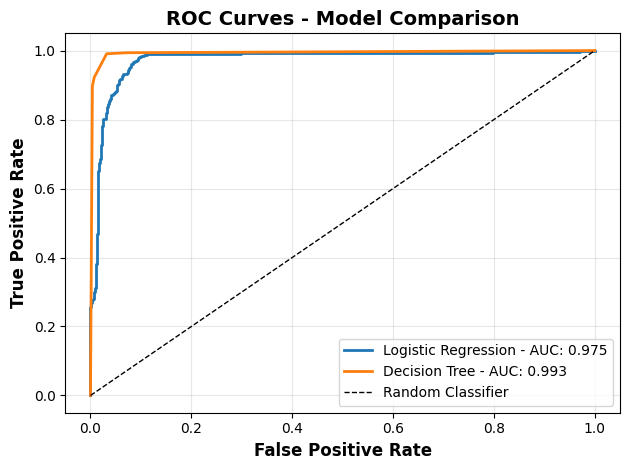

In [33]:
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression - AUC: {roc_auc_score(y_test, y_proba_lr):.3f}', linewidth=2)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree - AUC: {roc_auc_score(y_test, y_proba_dt):.3f}', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1)

plt.xlabel('False Positive Rate', fontweight='bold', fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold', fontsize=12)
plt.title('ROC Curves - Model Comparison', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()